In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import math

%matplotlib inline

In [3]:
def fetchData(tickers):
    dailyReturns = pd.DataFrame(columns=tickers)

    plt.figure(figsize=(15, 12))
    plt.suptitle("Closing Prices")

    for n, ticker in enumerate(tickers):
        #data = yf.download(ticker, start=start, end=end)
        data = yf.download(ticker, period='1y')
        dailyReturns[ticker] = data['Adj Close']

        ax = plt.subplot(math.ceil(len(tickers)/2), 2, n+1)

        dailyReturns[ticker].plot()

        ax.set_title(ticker)
        ax.set_xlabel("")

    plt.show()
    return dailyReturns

In [4]:
def process(stockData):
    stockData['Date'] = stockData.index
    stockData['Date'] = pd.to_datetime(stockData['Date'])

    min_max_scalar = preprocessing.MinMaxScaler(feature_range=(0, 1))
    for n, ticker in enumerate(tickers):
        X = []
        Y = []

        data = min_max_scalar.fit_transform(stockData[ticker].values.reshape(-1, 1))

        for i in range(lookBackPeriod, len(data) - forecastPeriod + 1):
            X.append(data[i - lookBackPeriod: i])
            Y.append(data[i: i + forecastPeriod])

        X = np.array(X)
        Y = np.array(Y)

        model = Sequential()
        model.add(LSTM(units=50, return_sequences=True, input_shape=(lookBackPeriod, 1)))
        model.add(LSTM(units=50))
        model.add(Dense(forecastPeriod))

        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(X, Y, epochs=10, batch_size=32)

        X_ = data[- lookBackPeriod:]  # last available input sequence
        X_ = X_.reshape(1, lookBackPeriod, 1)

        Y_ = model.predict(X_).reshape(-1, 1)
        Y_ = min_max_scalar.inverse_transform(Y_)


        currentData = pd.DataFrame(index=stockData['Date'], columns=[ticker])
        currentData[ticker] = stockData[ticker]
        currentData = currentData.reset_index()

        print(currentData.head())

        Date = pd.date_range(start=currentData['Date'].iloc[-1] + pd.Timedelta(days=1), periods=forecastPeriod)
        df_future = pd.DataFrame(index=Date, columns=[ticker])
        df_future['Date'] = pd.date_range(start=currentData['Date'].iloc[-1] + pd.Timedelta(days=1), periods=forecastPeriod)
        df_future[ticker] = Y_.flatten()
        meanReturn = df_future[ticker].mean().item()
        expectedReturn = df_future[ticker][-1].item()
        meanReturn = round(meanReturn, 2)
        expectedReturn = round(expectedReturn, 2)
        print(f'{meanReturn} {expectedReturn}')

        results = pd.concat([currentData, df_future]).set_index('Date')
        results.plot(title=f'{ticker} \n Mean Return: ${meanReturn} \n Expected {forecastPeriod} Day Return: ${expectedReturn}')
        plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


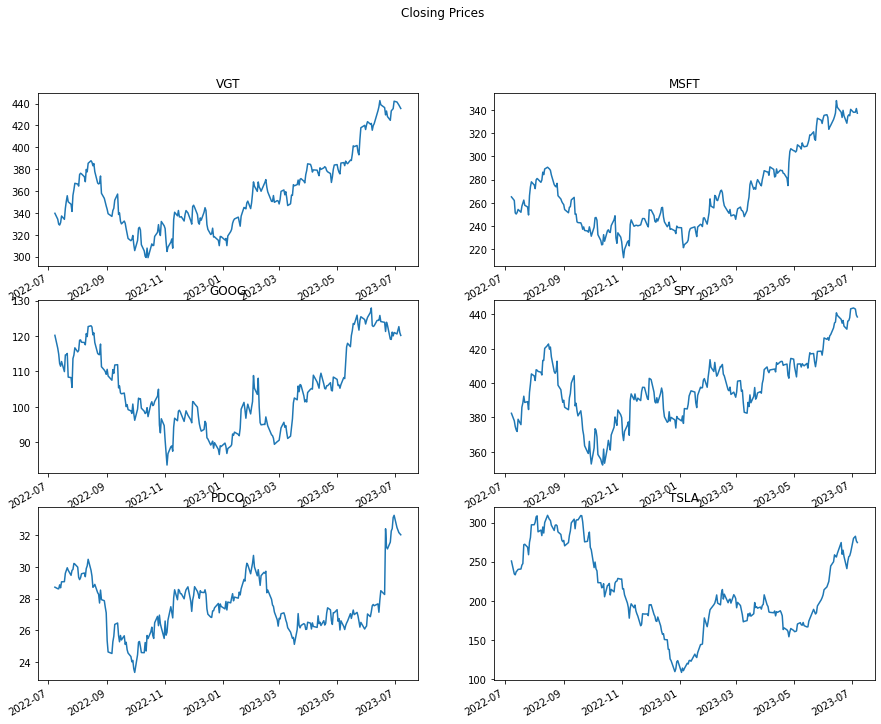

Epoch 1/10
6/6 [==============================] - 3s 34ms/step - loss: 0.2135
Epoch 2/10
6/6 [==============================] - 0s 32ms/step - loss: 0.1729
Epoch 3/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0988
Epoch 4/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0571
Epoch 5/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0424
Epoch 6/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0252
Epoch 7/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0183
Epoch 8/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0151
Epoch 9/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0130
Epoch 10/10
6/6 [==============================] - 0s 31ms/step - loss: 0.0119
        Date         VGT
0 2022-07-08  339.616669
1 2022-07-11  334.183411
2 2022-07-12  329.602814
3 2022-07-13  328.839447
4 2022-07-14  331.050354
447.62 467.63


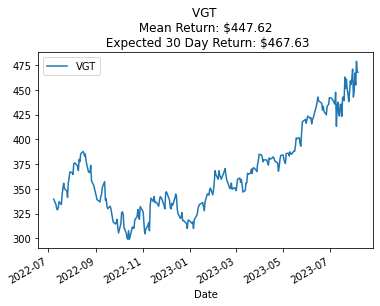

Epoch 1/10
6/6 [==============================] - 3s 34ms/step - loss: 0.2165
Epoch 2/10
6/6 [==============================] - 0s 33ms/step - loss: 0.1905
Epoch 3/10
6/6 [==============================] - 0s 32ms/step - loss: 0.1387
Epoch 4/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0761
Epoch 5/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0418
Epoch 6/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0255
Epoch 7/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0183
Epoch 8/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0145
Epoch 9/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0108
Epoch 10/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0103
        Date        MSFT
0 2022-07-08  265.097504
1 2022-07-11  261.977692
2 2022-07-12  251.241455
3 2022-07-13  250.300522
4 2022-07-14  251.647537
359.34 376.95


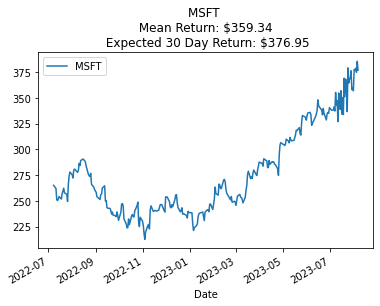

Epoch 1/10
6/6 [==============================] - 3s 34ms/step - loss: 0.2117
Epoch 2/10
6/6 [==============================] - 0s 33ms/step - loss: 0.1568
Epoch 3/10
6/6 [==============================] - 0s 33ms/step - loss: 0.1012
Epoch 4/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0667
Epoch 5/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0534
Epoch 6/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0474
Epoch 7/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0458
Epoch 8/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0421
Epoch 9/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0394
Epoch 10/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0370
        Date        GOOG
0 2022-07-08  120.168503
1 2022-07-11  116.522499
2 2022-07-12  114.849503
3 2022-07-13  112.186996
4 2022-07-14  111.440002
119.76 129.4


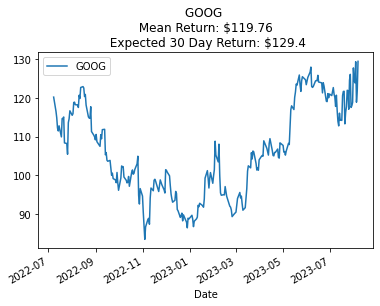

Epoch 1/10
6/6 [==============================] - 2s 34ms/step - loss: 0.2756
Epoch 2/10
6/6 [==============================] - 0s 33ms/step - loss: 0.2250
Epoch 3/10
6/6 [==============================] - 0s 33ms/step - loss: 0.1243
Epoch 4/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0673
Epoch 5/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0323
Epoch 6/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0224
Epoch 7/10
6/6 [==============================] - ETA: 0s - loss: 0.019 - 0s 33ms/step - loss: 0.0195
Epoch 8/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0195
Epoch 9/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0187
Epoch 10/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0180
        Date         SPY
0 2022-07-08  382.425079
1 2022-07-11  378.056427
2 2022-07-12  374.711060
3 2022-07-13  372.743164
4 2022-07-14  371.837952
418.48 431.45


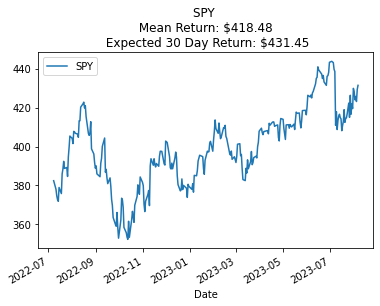

Epoch 1/10
6/6 [==============================] - 3s 35ms/step - loss: 0.1747
Epoch 2/10
6/6 [==============================] - 0s 33ms/step - loss: 0.1251
Epoch 3/10
6/6 [==============================] - 0s 34ms/step - loss: 0.0694
Epoch 4/10
6/6 [==============================] - 0s 34ms/step - loss: 0.0344
Epoch 5/10
6/6 [==============================] - 0s 34ms/step - loss: 0.0236
Epoch 6/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0212
Epoch 7/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0207
Epoch 8/10
6/6 [==============================] - 0s 34ms/step - loss: 0.0196
Epoch 9/10
6/6 [==============================] - 0s 34ms/step - loss: 0.0181
Epoch 10/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0174
        Date       PDCO
0 2022-07-08  28.723049
1 2022-07-11  28.626696
2 2022-07-12  28.617060
3 2022-07-13  28.867580
4 2022-07-14  28.684505
28.35 29.12


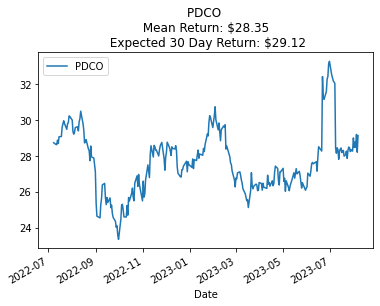

Epoch 1/10
6/6 [==============================] - 3s 34ms/step - loss: 0.1446
Epoch 2/10
6/6 [==============================] - 0s 33ms/step - loss: 0.1069
Epoch 3/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0599
Epoch 4/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0373
Epoch 5/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0311
Epoch 6/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0290
Epoch 7/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0268
Epoch 8/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0262
Epoch 9/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0260
Epoch 10/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0251
        Date        TSLA
0 2022-07-08  250.763336
1 2022-07-11  234.343338
2 2022-07-12  233.070007
3 2022-07-13  237.039993
4 2022-07-14  238.313339
194.23 187.8


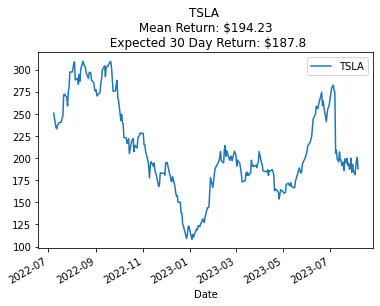

In [5]:
lookBackPeriod = 60
forecastPeriod = 30
tickers = ['VGT', 'MSFT', 'GOOG', 'SPY', 'PDCO', 'TSLA']

stockData = fetchData(tickers)
process(stockData)